# 0: Imports

In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import kneighbors_graph
from tqdm import tqdm
from scipy.spatial import distance
import scvi
from scvi.model.utils import mde
import os
import spaceTree.preprocessing as pp
import spaceTree.dataset as dataset
import warnings
warnings.simplefilter("ignore")

/data/olga/anaconda3/envs/torch_gnn/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/data/olga/anaconda3/envs/torch_gnn/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/data/olga/anaconda3/envs/torch_gnn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/olga/anaconda3/envs/torch_gnn/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. 

# 1: Open data files

## 1.1 RNA data and annotations

In [2]:
adata_ref = sc.read_10x_h5('../data/Chromium_FFPE_Human_Breast_Cancer_Chromium_FFPE_Human_Breast_Cancer_count_sample_filtered_feature_bc_matrix.h5')
adata_ref.var_names_make_unique()
cell_type = pd.read_excel("../data/Cell_Barcode_Type_Matrices.xlsx", sheet_name="scFFPE-Seq", index_col = 0)
clone_anno = pd.read_csv("../data/clone_annotation.csv", index_col = 0)

In [4]:
adata_ref.obs = adata_ref.obs.join(cell_type, how="left").join(clone_anno, how="left")

In [5]:
adata_ref.obs.columns = ['cell_type', 'clone']
adata_ref = adata_ref[~adata_ref.obs.cell_type.isna()]

## Visium data

In [10]:
visium = sc.read_visium("../data/", 
                        count_file='CytAssist_FFPE_Human_Breast_Cancer_filtered_feature_bc_matrix.h5')

TypeError: can't multiply sequence by non-int of type 'float'

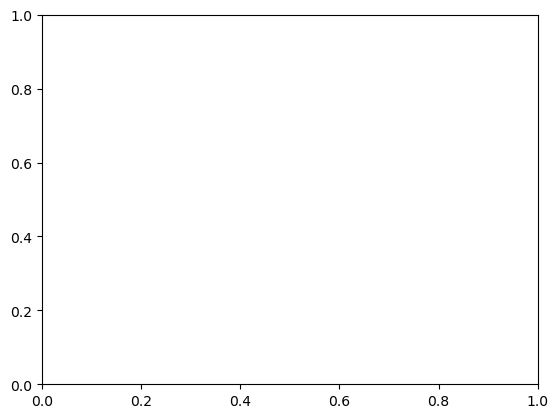

In [11]:
sc.pl.spatial(visium)

# 1: Run scvi to remove batch effects and prepare data for knn-graph construction

In [11]:
# 1: Run scvi to remove batch effects and prepare data for knn-graph construction

In [ ]:
#